In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt


def argmax (x):
    res = -1.0
    for i in x:
        if abs(i) > res:
            res = abs(i)
    return res

## Добавим исходную функцию и её производную

$f(x) = cos(x)$

$F(x) = sin(x)$


In [48]:
def f(x):
    return math.cos(1/(1+x))*(-(1/(1+x)**2)) 

def F(x):
    return math.sin(1/(1+x))


## Сделаем проектор

In [49]:
def projector (f, h, x_min, x_max):
    x = x_min
    res = np.zeros((2,0))
    while x < x_max:
        res = np.append(res, np.array([x,f(x)]).reshape(2,1), axis = 1)
        x += h
    res = np.append(res, np.array([x_max,f(x_max)]).reshape(2,1), axis = 1)
    return res

## Интеграл по левому прямоугольнику

In [50]:
def left_rect_Int (f, h, x_min, x_max):
    f_arr = projector(f, h, x_min, x_max)
    
    f_arr[0, 1:] = f_arr[0, 1:] - f_arr[0, 0: -1]
    f_arr[1, 1:] = f_arr[1, 1:]*f_arr[0, 1:]; 
    f_arr[1,0] = 0
    
    ans = np.sum(f_arr, axis = 1)[1]
    return ans

## Интеграл по правому прямоугольнику

In [51]:
def right_rect_Int (f, h, x_min, x_max):
    f_arr = projector(f, h, x_min, x_max)
    
    f_arr[0, 0: -1] = f_arr[0, 1:] - f_arr[0, 0: -1]
    f_arr[1, 0: -1] = f_arr[1, 0: -1]*f_arr[0, 0: -1]; 
    f_arr[1,-1] = 0;
    
    ans = np.sum(f_arr, axis = 1)[1]
    return ans

## Интеграл по центральным прямоугольникам

In [52]:
def midle_rect_Int (f, h, x_min, x_max):
    x = x_min
    f_arr = np.zeros((2,0))
    while x + h/2 < x_max:
        f_arr = np.append(f_arr, np.array([x,f(x + h/2)]).reshape(2,1), axis = 1)
        x += h
    f_arr[1,-1] = f((f_arr[0,-1] + x_max)/2)
    f_arr = np.append(f_arr, np.array([x_max,0]).reshape(2,1), axis = 1)
    
    f_arr[0,0:-1] = f_arr[0,1:] - f_arr[0,0:-1]
    
    f_arr[1,0:-1] = f_arr[1,0:-1]*f_arr[0,0:-1]
    
    ans = np.sum(f_arr, axis = 1)[1]
    
    return ans

## Интеграл по формуле стомпсона

In [53]:
def Stomp_Int (f, h_max, x_min, x_max):
    n = int((x_max - x_min)/h_max) + 1
    n = n+1 if (n%2 == 1) else n
    h = (x_max - x_min)/n
    
    f_arr = projector(f, h, x_min, x_max)
    
    summ = 0;
    
    for i in range (1, n, 2):
        summ += f_arr[1,i-1] + f_arr[1,i+1] + 4*f_arr[1,i]
    
    ans = summ*h/3
    
    return ans

## Интеграл по трапециям

In [54]:
def trapezoid_Int (f, h, x_min, x_max):
    f_arr = projector(f, h, x_min, x_max)
    
    f_arr[0,0:-1] = f_arr[0,1:] - f_arr[0,0:-1]
    f_arr[1,0:-1] = (f_arr[1,1:] + f_arr[1,0:-1])/2
    
    f_arr[0,-1] = 0;
    f_arr[1,-1] = 0;
    
    f_arr[1,0:-1] = f_arr[1,0:-1]*f_arr[0,0:-1]
    
    ans = np.sum(f_arr, axis = 1)[1]
    
    return ans

In [55]:
print(F(1) - F(0))
print(left_rect_Int(f, 0.001, 0, 1))
print(right_rect_Int(f, 0.001, 0, 1))
print(midle_rect_Int(f, 0.001, 0, 1))
print(trapezoid_Int(f, 0.001, 0, 1))
print(Stomp_Int(f, 0.001, 0, 1))

-0.3620454462036935
-0.36188499701286825
-0.36220590367826383
-0.36204544413274514
-0.3620454503455661
-0.3620454462035633


## Сгенерируем данные

In [56]:
F_left = np.zeros((1, 0))
F_right = np.zeros((1, 0))
F_midle = np.zeros((1, 0))
F_trapezoid = np.zeros((1, 0))
F_stomp = np.zeros((1, 0))

h_arr = np.zeros((1, 0))

h = 0.00001

F_res = F(1) - F(0)

while h < 0.01:
    F_left      = np.append(F_left,      abs(F_res - left_rect_Int(f, h, 0, 1)))
    F_right     = np.append(F_right,     abs(F_res - right_rect_Int(f, h, 0, 1)))
    F_midle     = np.append(F_midle,     abs(F_res - midle_rect_Int(f, h, 0, 1)))
    F_trapezoid = np.append(F_trapezoid, abs(F_res - trapezoid_Int(f, h, 0, 1)))
    F_stomp     = np.append(F_stomp,     abs(F_res - Stomp_Int(f, h, 0, 1)))
    
    h_arr       = np.append(h_arr,       h)
    
    h = h*2
    

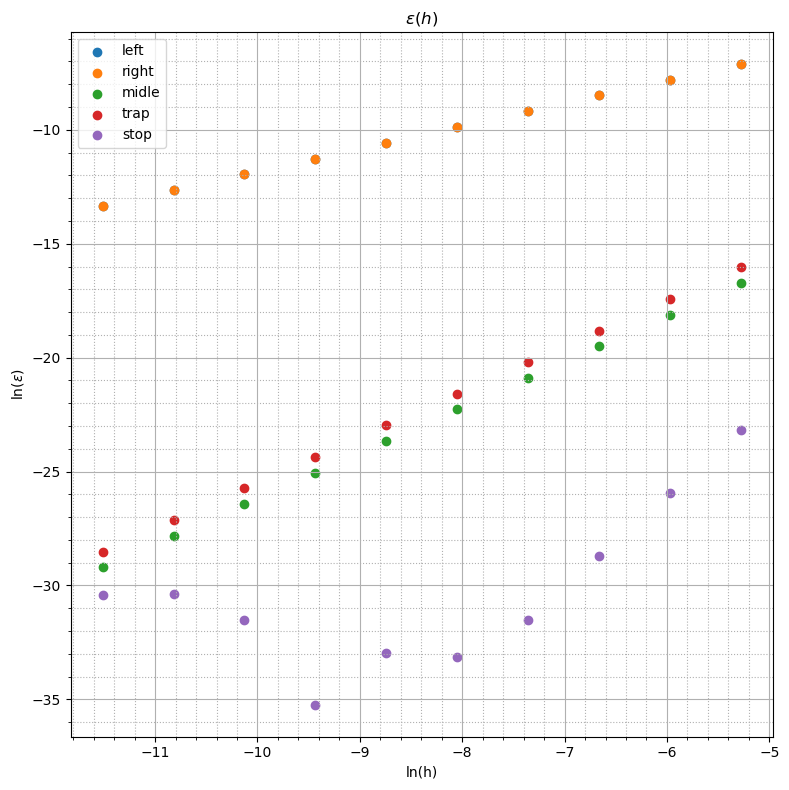

In [57]:
plt.figure(figsize=(8, 8))
plt.title("$\epsilon (h)$")

left      = plt.scatter(np.log(h_arr), np.log(F_left)      , marker='o', label = "left")
right     = plt.scatter(np.log(h_arr), np.log(F_right)     , marker='o', label = "right")
midle     = plt.scatter(np.log(h_arr), np.log(F_midle)     , marker='o', label = "midle")
trapezoid = plt.scatter(np.log(h_arr), np.log(F_trapezoid) , marker='o', label = "trap")
stomp     = plt.scatter(np.log(h_arr), np.log(F_stomp)     , marker='o', label = "stop")


plt.legend(handles = [left, right, midle, trapezoid, stomp])

#plt.scatter(h_arr, res_1_22, marker='o')

plt.xlabel("ln(h)")
plt.ylabel("ln($\epsilon$)")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
# plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()